In [1]:
import pandas as pd
from analysis.homogeneous.analysis import best, plot, plt_comparison

In [2]:
all_data_df = pd.read_csv('all_data_groundheavy.tsv', sep='\t')
all_data_df['idle_time'] =  all_data_df['idle_time'] /3
all_data_df['idle_time_interval'] =  all_data_df['idle_time_interval'] /3

Overall plots of all different simulations

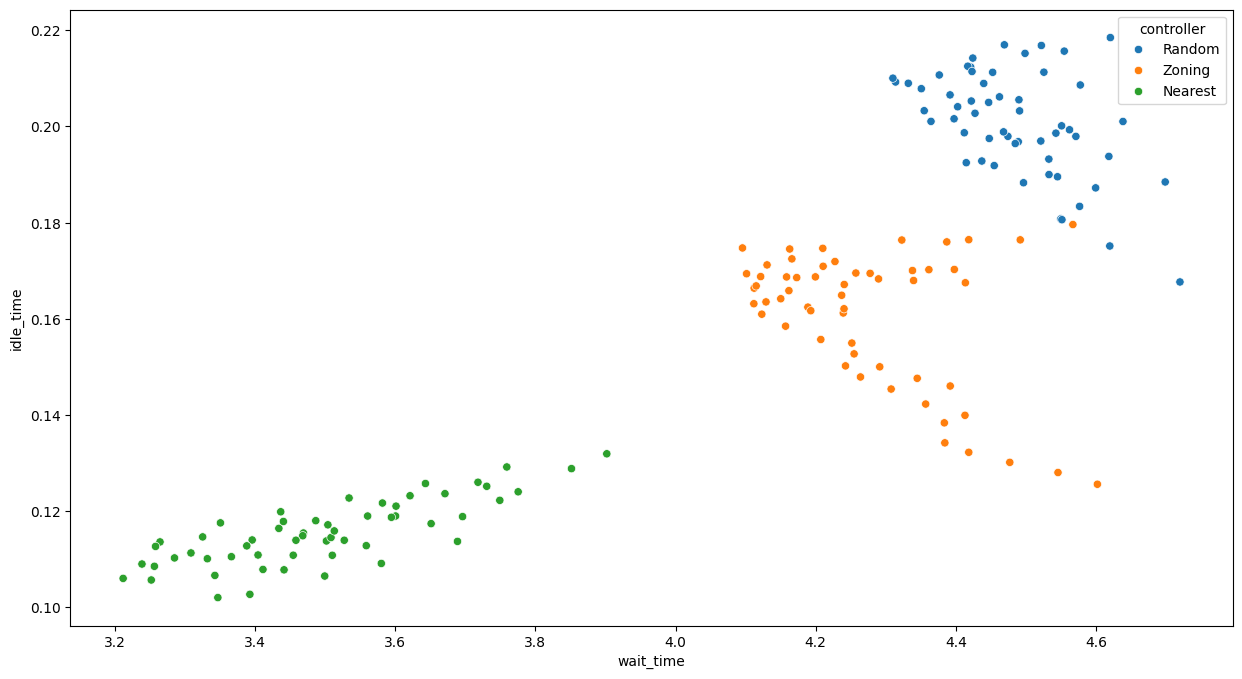

In [3]:
plot(all_data_df,"overall_plot")

Best Idle Configuration

In [4]:
best_configuration = best(all_data_df, 'idle_floor_config')
best_configuration[0]

Best idle_floor_config: (3, 3, 3)


,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
147,Random,"(3, 3, 3)",127,4.310278,0.033796,0.210035,0.013518,4.344075
148,Zoning,"(3, 3, 3)",148,4.257410,0.027914,0.169522,0.012666,4.285324
149,Nearest,"(3, 3, 3)",310,3.211491,0.028671,0.106031,0.010879,3.240163


Best controller

Best controller: Nearest


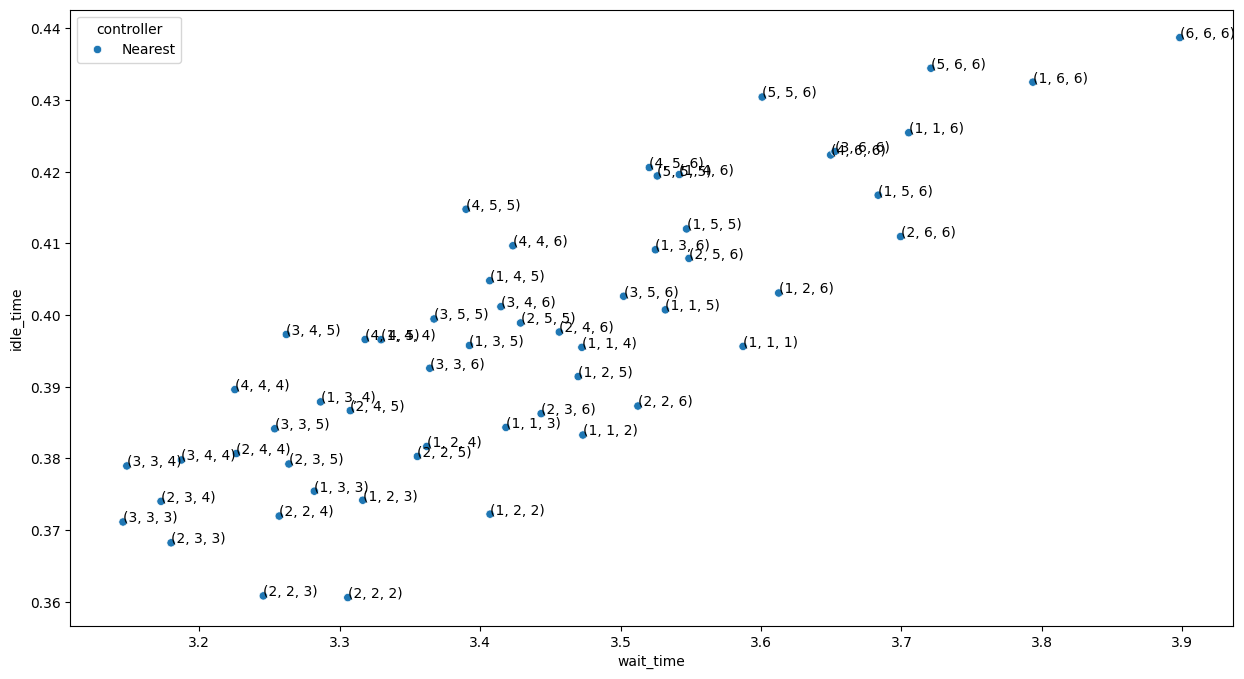

In [5]:
best_controller = best(all_data_df, 'controller')
best_controller_data = all_data_df.loc[all_data_df['controller'] == best_controller[1]]
plot(best_controller_data, 'best_controller_plot', True)

In [6]:
best_controller[0].head()

,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
2,Nearest,"(2, 2, 2)",396,3.305786,0.032429,0.360597,0.012153,3.338214
5,Nearest,"(3, 5, 6)",303,3.502172,0.032633,0.402621,0.011530,3.534805
8,Nearest,"(1, 6, 6)",326,3.793570,0.032332,0.432480,0.011241,3.825902
11,Nearest,"(2, 2, 5)",379,3.355321,0.031000,0.380283,0.011998,3.386321
14,Nearest,"(4, 4, 4)",402,3.225377,0.028800,0.389603,0.012673,3.254178


Specific Comparisons

In [1]:

from run_experiment import run_experiment, run_analysis
import simulation.classes.groupController as gControl
import simulation.classes.arrival_pattern as arrPattern
import pandas as pd
from analysis.homogeneous.analysis import best, plot, plt_comparison
# from simulation.utils import get_all_idle_combinations


In [2]:
def run_sim_idle(type, idle_config, arr):
        params = {
                "seed": 1,
                "num_floors": 6,
                "num_elevators": 3,
                "total_arrival_rate": 0.6,
                "simulation_duration": 72000
                }

        print("random seed:", params["seed"])
        print("simulation duration:", params["simulation_duration"])
        print("number of floors:", params["num_floors"])
        print("number of elevators:", params["num_elevators"])

        zoning_params = {
                "zones": {
                        1: [1, 2],
                        2: [3, 4],
                        3: [5, 6]
                }
                }
        if arr == "uniform":
                arrival_pattern = arrPattern.UniformArrival
                arrival_args = {
                "num_floors": params["num_floors"],
                "total_arrival_rate": 0.6
                } 
        else:
                arrival_pattern = arrPattern.GroundHeavy
                arrival_args = {
                        "num_floors": params["num_floors"],
                        "total_arrival_rate": 0.6,
                        "ground_percentage": 0.35
                        }


        conditions = {
                "Random": (gControl.RandomController, {}),
                "Zoning": (gControl.ZoningController, zoning_params),
                "Nearest": (gControl.NearestElevatorController, {})
                }
                
        controller_params = {
                "idle_floors": [1] * params["num_elevators"]
                }


        collated_result = []

        for controller_name, (controller_class, controller_params) in conditions.items():
                        controller_params["idle_floors"] = idle_config
                        sim_result = run_experiment(params, arrival_pattern, arrival_args, controller_class, controller_params)
                
                        result = run_analysis(params, sim_result, controller_name) 
                        result["overall_stats"] = result["overall_stats"].set_index("stat label")
                
                        trial_result = {
                                "controller": controller_name,
                        #     "idle_floor_config": (3,3,4),
                                "steady state average": result[type].loc[:,'steady state average'],
                                "elevator": result[type].loc[:, 'elevator'],
                                "lower interval": result[type].loc[:, "lower interval"],
                                "upper interval": result[type].loc[:, "upper interval"]
                                }
                        collated_result.append(trial_result)
        return collated_result
def run_sim_wait(type, idle_config, arr):
        params = {
                "seed": 1,
                "num_floors": 6,
                "num_elevators": 3,
                "total_arrival_rate": 0.6,
                "simulation_duration": 72000
                }

        print("random seed:", params["seed"])
        print("simulation duration:", params["simulation_duration"])
        print("number of floors:", params["num_floors"])
        print("number of elevators:", params["num_elevators"])

        zoning_params = {
                "zones": {
                        1: [1, 2],
                        2: [3, 4],
                        3: [5, 6]
                }
                }

        arrival_pattern = arrPattern.GroundHeavy
        arrival_args = {
                        "num_floors": params["num_floors"],
                        "total_arrival_rate": 0.6,
                        "ground_percentage": 0.35
                        }

        conditions = {
                "Random": (gControl.RandomController, {}),
                "Zoning": (gControl.ZoningController, zoning_params),
                "Nearest": (gControl.NearestElevatorController, {})
                }
                
        controller_params = {
                "idle_floors": [1] * params["num_elevators"]
                }


        collated_result = []

        for controller_name, (controller_class, controller_params) in conditions.items():
                        controller_params["idle_floors"] = idle_config
                        sim_result = run_experiment(params, arrival_pattern, arrival_args, controller_class, controller_params)
                
                        result = run_analysis(params, sim_result, controller_name) 
                        result["overall_stats"] = result["overall_stats"].set_index("stat label")
                
                        trial_result = {
                                "controller": controller_name,
                        #     "idle_floor_config": (3,3,4),
                                "steady state average": result[type].loc[:,'steady state average'],
                                "floor": result[type].loc[:, 'floor'],
                                "lower interval": result[type].loc[:, "lower interval"],
                                "upper interval": result[type].loc[:, "upper interval"]
                                }
                        collated_result.append(trial_result)

        return collated_result


In [3]:
result = run_sim_idle("idle_time",[3,3,3], "ground heavy")

random seed: 1
simulation duration: 72000
number of floors: 6
number of elevators: 3


In [4]:
a = pd.DataFrame(result[0])
b = pd.DataFrame(result[1])
c = pd.DataFrame(result[2])
idle_data = [a,b,c]

In [5]:
plt_comparison(idle_data,["Random", "Zoning", "Nearest"], "idle time" )


In [6]:
result = run_sim_wait("wait_time", [3,3,3], "ground heavy")
a = pd.DataFrame(result[0])
b = pd.DataFrame(result[1])
c = pd.DataFrame(result[2])
wait_data = [a,b,c]

random seed: 1
simulation duration: 72000
number of floors: 6
number of elevators: 3


In [7]:
plt_comparison(wait_data,["Random", "Zoning", "Nearest"], "wait time" )